#### 数组对象

Numpy中的ndarray是一个多维数组对象，该对象由两部分组成：

- 实际的数据。
- 描述这些数据的元数据。

大部分的数组操作仅仅修改元数据部分，而不改变底层的实际数据。

数组的shape属性返回一个元组(tuple)，元组中的元素即为Numpy数组每一个维度上的大小。

In [4]:
# 创建多维数组

import numpy as np

m = np.array([np.arange(2), np.arange(2)])
m

array([[0, 1],
       [0, 1]])

#### 数据类型对象
数据类型对象是`numpy.dtype`类的实例。

numpy数组是有数据类型的，numpy数组中的每一个元素均为相同的数据类型。

数据类型对象可以给出单个数组元素在内存中占用的字节数，即dtype类的itemsize属性：

In [5]:
m.dtype.itemsize

4

#### 字符编码


|数据类型|字符编码|
|----|---|
| 整数 | i |
| 无符号整数 | u |
| 单精度浮点数 | f |
| 双精度浮点数 | d |
| 布尔值 | b |
| 复数 | D |
| 字符串 | S |
| unicode | U |
| void(空) | V |


In [6]:
np.arange(7, dtype='f')

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.], dtype=float32)

In [8]:
np.arange(7, dtype='D')

array([ 0.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j,  5.+0.j,  6.+0.j])

#### 自定义数据类型

In [10]:
# 使用Python中的浮点数类型
np.dtype(float)

dtype('float64')

In [15]:
# 使用字符编码来指定浮点数类型 
n = np.dtype('f')
print(n)
m = np.dtype('d')
print(m)

float32
float64


In [16]:
# 将两个字符作为参数传给数据类型的构造函数。第一个字符表示数据类型，
# 第二个字符表示该类型在内存中占用的字节数(2、4、8分别代表精度为16、32、64位的浮点数)
np.dtype('f8')

dtype('float64')

In [20]:
# 创建自定义数据类型
# 创建数据类型 - 存储商店库存， 商品名称 库存数量 价格
t = np.dtype([('name', str, 40), ('numtimes', np.int32), ('price', float)])
t

dtype([('name', '<U40'), ('numtimes', '<i4'), ('price', '<f8')])

In [21]:
t['name']

dtype('<U40')

#### 一维数组的索引和切片

In [22]:
a = np.arange(9)
a[3:7]

array([3, 4, 5, 6])

In [23]:
# 多维数据的切片和索引
b = np.arange(24).reshape(2,3,4)
b.shape

(2, 3, 4)

In [24]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [25]:
# 可以用三维坐标来选定任意一个位置的元素
b[0, 0, 0]

0

In [26]:
b[0, :, :]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
# 多个冒号可以用一个省略号(...)来代替
b[0,...]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
b[0,1]

array([4, 5, 6, 7])

In [29]:
# 数组切片中间隔地选定元素
b[0, 1, ::2]

array([4, 6])

In [30]:
# 选取所有楼层的第2列的元素，既不指定楼层和行号
b[...,1]

array([[ 1,  5,  9],
       [13, 17, 21]])

In [32]:
# 选取第一层最后一列
b[0,:,-1]

array([ 3,  7, 11])

In [34]:
# 反选第一层最后一列
b[0,::-1,-1]

array([11,  7,  3])

In [35]:
# 反转第一层第二层
b[::-1]

array([[[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

#### 改变数组维度

In [36]:
# （1） ravel - 完成展平数组
b.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [38]:
# (2) flatten - 也是展平的功能。 flatten会请求内存来存储结果， ravel - 只是返回数组的一个视图
b.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [40]:
# (3) 用元组设置维度 
b.shape = (6, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [41]:
# (4) transpose -- 转置矩阵
b.transpose()

array([[ 0,  4,  8, 12, 16, 20],
       [ 1,  5,  9, 13, 17, 21],
       [ 2,  6, 10, 14, 18, 22],
       [ 3,  7, 11, 15, 19, 23]])

#### 数组的组合
Numpy数组有水平组合、垂直组合和深度组合等多种组合方式。可使用vstack、dstack、hstack、column_stack、row_stack以及concatenate来完成组合。

In [42]:
# （1） 创建数组
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [43]:
b = 2*a
b

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [47]:
# 水平组合，将ndarray对象构成的元组作为参数，传给hstack函数。
np.hstack((a,b))

array([[ 0,  1,  2,  0,  2,  4],
       [ 3,  4,  5,  6,  8, 10],
       [ 6,  7,  8, 12, 14, 16]])

In [49]:
# 也可以用concatenate函数来实现相同的效果
np.concatenate((a,b), axis=1)

array([[ 0,  1,  2,  0,  2,  4],
       [ 3,  4,  5,  6,  8, 10],
       [ 6,  7,  8, 12, 14, 16]])

In [50]:
# 垂直组合
np.vstack((a,b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [51]:
# concatenate中 axis = 0 以列来组合
np.concatenate((a,b), axis=0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [52]:
# 深度组合 将相同的元组作为参数传给dstack。
# 深度组合就是将一系列数组沿着纵轴（深度方向）方向进行层叠组合
np.dstack((a,b))

array([[[ 0,  0],
        [ 1,  2],
        [ 2,  4]],

       [[ 3,  6],
        [ 4,  8],
        [ 5, 10]],

       [[ 6, 12],
        [ 7, 14],
        [ 8, 16]]])

In [54]:
# 列组合 - column_stack 对于一维数组将按列方向进行组合 第一个数组元素为行首元素
one = np.arange(2)
twice_oned = 2 * one
np.column_stack((one, twice_oned))

array([[0, 0],
       [1, 2]])

In [58]:
# 对于二维数组， column_stack 和 hstack 效果相同
np.column_stack((a,b))

array([[ 0,  1,  2,  0,  2,  4],
       [ 3,  4,  5,  6,  8, 10],
       [ 6,  7,  8, 12, 14, 16]])

In [60]:
# 行组合 - row_stack  直接将两个一维数组按层叠起来组合成一个二维数组
np.row_stack((one,twice_oned))

array([[0, 1],
       [0, 2]])

In [61]:
# 对于二维数组,row_stack和vstack效果一样
np.row_stack((a,b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

#### 分割数组

In [62]:
# (1) 水平分割 沿着水平方向分割
np.hsplit(a,3)

[array([[0],
        [3],
        [6]]), array([[1],
        [4],
        [7]]), array([[2],
        [5],
        [8]])]

In [63]:
# split函数在参数中指定 axis=1也可实现
np.split(a, 3, axis=1)

[array([[0],
        [3],
        [6]]), array([[1],
        [4],
        [7]]), array([[2],
        [5],
        [8]])]

In [64]:
# (2) 垂直分割 - 沿着垂直方向分割
np.vsplit(a, 3)

[array([[0, 1, 2]]), array([[3, 4, 5]]), array([[6, 7, 8]])]

In [65]:
# split函数中axis=0也可实现
np.split(a, 3, axis=0)

[array([[0, 1, 2]]), array([[3, 4, 5]]), array([[6, 7, 8]])]

In [68]:
# (3) 深度分割 - 按深度方向分割数组
c = np.arange(27).reshape(3, 3, 3)
c

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [67]:
np.dsplit(c, 3)

[array([[[ 0],
         [ 3],
         [ 6]],
 
        [[ 9],
         [12],
         [15]],
 
        [[18],
         [21],
         [24]]]), array([[[ 1],
         [ 4],
         [ 7]],
 
        [[10],
         [13],
         [16]],
 
        [[19],
         [22],
         [25]]]), array([[[ 2],
         [ 5],
         [ 8]],
 
        [[11],
         [14],
         [17]],
 
        [[20],
         [23],
         [26]]])]

#### 数组的属性

In [69]:
# ndim 属性 - 数组的维数
b

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [70]:
b.ndim

2

In [71]:
# size 数组元素的总个数
b.size

9

In [72]:
# itemsize 元素在内存中占的字节数
b.itemsize

4

In [73]:
# nbytes - 整个数组所占的存储空间 size * itemsize
b.nbytes

36

##### T 属性和transpose函数一样
#####  对于一维数组 T 属性就是原数组 

In [76]:
# 复数的虚部用j表示
# real属性 -- 给出复数数组的实部 imag -- 复数的虚部

# flat属性 -- 返回一个numpy.flatiter对象，可以像遍历一维数组一样去遍历多维数组
x = np.arange(4).reshape(2, 2)
x

array([[0, 1],
       [2, 3]])

In [79]:
f = x.flat
f

In [82]:
# 直接获取一个元素
x.flat[2]

2

In [83]:
# 后去多个元素
x.flat[[1, 3]]

array([1, 3])

#### 数组的转换

In [84]:
# 转换为列表
b.tolist()

[[0, 2, 4], [6, 8, 10], [12, 14, 16]]

In [85]:
# astype可以再转换数组时指定数组类型
b.astype(np.float32)

array([[  0.,   2.,   4.],
       [  6.,   8.,  10.],
       [ 12.,  14.,  16.]], dtype=float32)

### 常用函数
#### 读写文件

In [86]:
# 写文件
# (1) - 单位矩阵 - 主对角线上的元素均为1，其余为0的正方形矩阵。
i2 = np.eye(2)
i2

array([[ 1.,  0.],
       [ 0.,  1.]])

In [87]:
# savetxt 指名文件名以及要保存的数组，将数据存储到文件中
np.savetxt("eye.txt", i2)

#### 读入 CSV 文件

In [91]:

# loadtxt - 文件名 分隔符 要获取的字段数据组成的元组  分拆存储
c,v = np.loadtxt("data.csv", delimiter=",", usecols=(6,7), unpack=True)
print(c)
v

[ 336.1   339.32  345.03  344.32  343.44  346.5   351.88  355.2   358.16
  354.54  356.85  359.18  359.9   363.13  358.3   350.56  338.61  342.62
  342.88  348.16  353.21  349.31  352.12  359.56  360.    355.36  355.76
  352.47  346.67  351.99]


array([ 21144800.,  13473000.,  15236800.,   9242600.,  14064100.,
        11494200.,  17322100.,  13608500.,  17240800.,  33162400.,
        13127500.,  11086200.,  10149000.,  17184100.,  18949000.,
        29144500.,  31162200.,  23994700.,  17853500.,  13572000.,
        14395400.,  16290300.,  21521000.,  17885200.,  16188000.,
        19504300.,  12718000.,  16192700.,  18138800.,  16824200.])

#### VWAP(Volume-Weighted Average Price) - 成交量加权平均价格，代表着金融资产的"平均"价格。某个成交价格越高， 该价格所占的权重就越大。是以成交量为权重计算出来的加权平均值，常用于算法交易。


In [93]:
# (1) 读取文件
#c,v = np.loadtxt("data.csv", delimiter=",", usecols=(6,7), unpack=True)
# (2) 计算VWAP
vwap = np.average(c, weights=v)
vwap

350.58954935320088

#### TWAP(Time-Weighted Average Price) - 时间加权平均价格，近期的价格有较高的权重

In [95]:
t = np.arange(len(c))
np.average(c, weights=t)

352.42832183908041

##### 取值范围

In [96]:
h, l = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5), unpack=True) # 每日最高价和最低价

# 最大值
print("Highest price = ", np.max(h))
print("Lowest price = ", np.min(l))

Highest price =  364.9
Lowest price =  333.53


In [97]:
# 数组的取值范围
# ptp  - 返回 max(array) - min(array)
print("Spread high price ", np.ptp(h))
print("Spread low price ", np.ptp(l))

Spread high price  24.86
Spread low price  26.97


In [98]:
# 中位数去除异常值
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)

# 找到中位数 长度奇数个数的数组，中位数为中间数 长度为偶数个数数组，中位数的值等于中间那两个数的平均值
print("median = ", np.median(c))

median =  352.055


In [99]:
# 方差 - 能够体现变量变化的程度
print("Variance = ", np.var(c))

Variance =  50.1265178889


#### 股票收益率
收盘价的分析常常是基于股票收益率和对数收益率的。

简单收益率是指相邻两个价格之间的变化率，对数收益率指的是所有价格取对数以后两两之间的差值。对数收益率也可用来衡量价格的变化率。

投资者最感兴趣的是收益率的方差和标准差，代表着投资风险的大小。

In [101]:
# 计算简单收益率
# numpy中的diff函数可以返回一个由相邻数组元素的差值构成的数组。 类似于微分。为了计算差值，还需用差值除以前一天的价格。
# diff返回的数组比收盘价数组少一个元素
returns = np.diff(c)/c[:-1]
print("Standard deviation = ", np.std(returns)) # std计算标准差

Standard deviation =  0.0129221344368


In [102]:
# 对数收益率 先用log函数得到每一个收盘价的对数，在对结果使用diff函数即可
logreturns = np.diff(np.log(c))
print("Log deviation = ", logreturns)

Log deviation =  [ 0.00953488  0.01668775 -0.00205991 -0.00255903  0.00887039  0.01540739
  0.0093908   0.0082988  -0.01015864  0.00649435  0.00650813  0.00200256
  0.00893468 -0.01339027 -0.02183875 -0.03468287  0.01177296  0.00075857
  0.01528161  0.01440064 -0.011103    0.00801225  0.02090904  0.00122297
 -0.01297267  0.00112499 -0.00929083 -0.01659219  0.01522945]


In [103]:
# where指定返回条件, 返回索引组成的数组
print("Indices with positive returns", np.where(returns>0))

Indices with positive returns (array([ 0,  1,  4,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 21, 22, 23,
       25, 28], dtype=int64),)


In [104]:
# 波动率(volatility)是对价格变动的一种度量。
# 历史波动率可以根据历史价格数据计算得出。 计算历史波动率（年波动率或月波动率）需要用对数收益率。
# 年波动率等于对数收益率的标准差除以其均值，再除以交易日倒数的平方根，通常交易日取252天。
annual_volatility = np.std(logreturns) / np.mean(logreturns)
annual_volatility = annual_volatility / np.sqrt(1./252.)
print(annual_volatility)

129.274789911


In [111]:
# 分析日期数据
# 转换日期时需要参数converters - 数据列和转换函数之间进行映射的字典

# 定义转换函数
import datetime
def datestr2num(s):
    return datetime.datetime.strptime(str(s, encoding='utf-8'), "%d-%m-%Y").date().weekday()

dates, close = np.loadtxt("data.csv", delimiter=',', usecols=(1, 6), converters={1:datestr2num}, unpack=True)
print(dates)


[ 4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.  1.  2.
  3.  4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.]


In [112]:
# 创建数组 包含5个元素，代表一周的5个工作日
averages = np.zeros(5)

In [114]:
# where函数会根据指定的条件的数组元素的索引值。 
# take函数可以按照这些索引值从数组中取出相应的元素。
for i in range(5):
    indices = np.where(dates==i)
    prices = np.take(close, indices)
    avg = np.mean(prices)
    print("Day ", i ," prices ", prices, " Average ", avg)
    averages[i] = avg

Day  0  prices  [[ 339.32  351.88  359.18  353.21  355.36]]  Average  351.79
Day  1  prices  [[ 345.03  355.2   359.9   338.61  349.31  355.76]]  Average  350.635
Day  2  prices  [[ 344.32  358.16  363.13  342.62  352.12  352.47]]  Average  352.136666667
Day  3  prices  [[ 343.44  354.54  358.3   342.88  359.56  346.67]]  Average  350.898333333
Day  4  prices  [[ 336.1   346.5   356.85  350.56  348.16  360.    351.99]]  Average  350.022857143


In [115]:
top = np.max(averages)
print("Highest average", top)
print("Top day of the week ", np.argmax(averages)) # argmax 返回数组中最大值的索引
bottom = np.min(averages)
print("Lowest average ", bottom)
print("Bottom day of the week ", np.argmin(averages))

Highest average 352.136666667
Top day of the week  2
Lowest average  350.022857143
Bottom day of the week  4


##### 汇总数据

In [127]:
dates, open_, high, low, close = np.loadtxt("data.csv", delimiter=',', usecols=(1,3,4,5,6), converters={1: datestr2num}, unpack=True)

# 取前三周数据
close = close[:16]
dates = dates[:16]

# 找到第一个星期一
first_monday = np.ravel(np.where(dates==0))[0]
print("The first Monday index is ", first_monday)

# 找到最后一个星期五
last_friday = np.ravel(np.where(dates == 4))[-1]
print("The last Friday index is ", last_friday)

The first Monday index is  1
The last Friday index is  15


In [128]:
# 存储三周内每一天的索引值
weeks_indices = np.arange(first_monday, last_friday + 1)
print("Weeks indices initial ", weeks_indices)

Weeks indices initial  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [129]:
# 按照每个子数组5个元素分割数组
weeks_indices = np.split(weeks_indices, 5)
print("Weeks indices after split", weeks_indices)

Weeks indices after split [array([1, 2, 3], dtype=int64), array([4, 5, 6], dtype=int64), array([7, 8, 9], dtype=int64), array([10, 11, 12], dtype=int64), array([13, 14, 15], dtype=int64)]


In [132]:
# apply_along_axis函数会调用另外一个给出的函数，作用于每一个数组元素上。
def summarize(a, o, h, l, c):
    monday_open = o[a[0]]
    week_high = np.max(np.take(h, a))
    week_low = np.min(np.take(l, a))
    friday_close = c[a[-1]]
    return("APPL", monday_open, week_high, week_low, friday_close)

weeksummary = np.apply_along_axis(summarize, 1, weeks_indices, open_, high, low, close)
print("Week summary", weeksummary)

Week summary [['APPL' '335.8' '345.65' '334.3' '344.32']
 ['APPL' '343.8' '353.25' '338.55' '351.88']
 ['APPL' '353.68' '360.0' '348.0' '354.54']
 ['APPL' '354.75' '359.97' '353.54' '359.9']
 ['APPL' '360.8' '364.9' '349.52' '350.56']]


##### 真实波动幅度均值(ATR)
ATR(Average True Range, 真实波动幅度均值)是一个用来衡量股价波动性的技术指标。

In [133]:
# maxinum 返回一组数组之间按照元素挑选最大值组成的数组

#### 简单移动平均线
简单移动平均线(simple moving average)通常用于分析时间序列上的数据。

为了计算它，需要定义一个N个周期的移动窗口，按照时间序列滑动窗口，计算窗口内数据的均值。

移动平均线只需要少量的循环和均值函数即可计算出。 -- numpy更优的选择 convolve函数。

简单移动平均线只不过是计算与等权重的指示函数的卷积。也可以是不等权重的。

简单移动平均线可以用信号处理技术求解 - 与 1/N 的权重进行卷积运算，N为移动窗口大小。

In [134]:
# (1) 创建一个长度为N 的初始化所有元素为1的数组
N = int(8)
weights = np.ones(N) / N
print("Weights ", weights)

Weights  [ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]


In [135]:
# 使用计算出的权重，调用 convolve函数
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)
sma = np.convolve(weights, c)[N-1:-N+1]

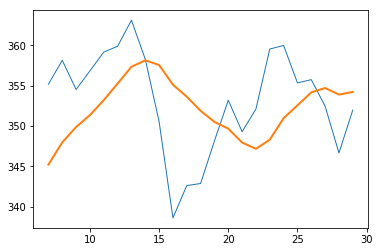

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
t = np.arange(N-1, len(c))
plt.plot(t, c[N-1:], lw=1.0)
plt.plot(t, sma, lw=2.0)
plt.show()

#### 指数移动平均线
指数移动平均线使用的权重是指数衰减的。对历史上的数据点赋予的权重以指数速度减小。

In [139]:
# exp 计算出每个数组元素的指数
x = np.arange(5)
print("Exp ", np.exp(x))

Exp  [  1.           2.71828183   7.3890561   20.08553692  54.59815003]


In [140]:
# linspace 需要一个起始值和终止值，以及可选的元素个数参数，返回一个元素值在指定范围内均匀分布的数组。
print("Linspace ", np.linspace(-1, 0, 5))

Linspace  [-1.   -0.75 -0.5  -0.25  0.  ]


In [141]:
N = int(12)
weights = np.exp(np.linspace(-1., 0., N))

# 对权重做归一化处理
weights /= weights.sum()
print("Weights ", weights)

Weights  [ 0.04813882  0.05272016  0.05773751  0.06323236  0.06925014  0.07584064
  0.08305835  0.09096297  0.09961986  0.10910063  0.11948368  0.13085487]


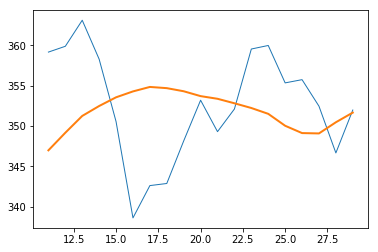

In [142]:
c = np.loadtxt("data.csv", delimiter=',', usecols=(6,), unpack=True)
ema = np.convolve(weights, c)[N-1:-N+1]
t = np.arange(N-1, len(c))
plt.plot(t, c[N-1:], lw=1.0)
plt.plot(t, ema, lw=2.0)
plt.show()

##### 布林带
布林带(Bollinger and)用以刻画价格波动的区间。

布林带的基本形态是由三条轨道线组成的带状通道：
- 中轨 简单移动平均线
- 上轨 简单移动平均线+数据标准差的2倍
- 下轨 简单移动平均线-数据标准差的2倍

23 23
[ 325.43001013  331.29513631  335.01969422  338.22653721  340.18888822
  339.26961781  335.01592647  331.70251977  335.54067913  339.88062827
  342.32882144  340.7375972   336.88547089  334.91170988  333.29127206
  334.64992614  338.14246839  343.69702832  345.85665916  345.68844007
  345.96773994]
[ 345.03  344.32  343.44  346.5   351.88  355.2   358.16  354.54  356.85
  359.18  359.9   363.13  358.3   350.56  338.61  342.62  342.88  348.16
  353.21  349.31  352.12]
[ 374.33748987  371.42736369  371.41780578  372.32596279  374.52111178
  377.04538219  380.13907353  378.56498023  371.74682087  363.91437173
  358.71117856  358.6299028   359.02702911  359.45579012  363.32622794
  367.31507386  367.00753161  364.67297168  363.59084084  362.12405993
  362.51476006]
Ratio between bands 0.9130434782608695


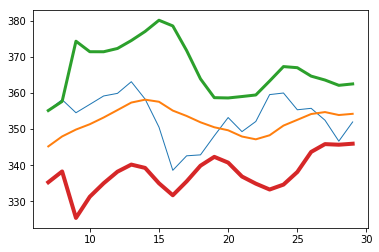

In [146]:
N = int(8)
weights = np.ones(N) / N

c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)
sma = np.convolve(weights, c)[N-1:-N+1] # 简单移动平均线
deviation =  []
C = len(c)

for i in range(N - 1, C):
    if i+N < C:
        dev = c[i:i+N]
    else:
        dev = c[-N:]
        
    averages = np.zeros(n)
    averages.fill(sma[i-N-1])
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
    
deviation = 2 * np.array(deviation)
print(len(deviation), len(sma))
upperBB = sma + deviation
lowerBB = sma - deviation

c_slice = c[N-1:]
between_bands = np.where((c_slice < upperBB) & (c_slice>lowerBB))

print(lowerBB[between_bands])
print(c[between_bands])
print(upperBB[between_bands])
between_bands = len(np.ravel(between_bands))
print("Ratio between bands", float(between_bands)/len(c_slice))

t = np.arange(N-1, C)
plt.plot(t, c_slice, lw=1.0)
plt.plot(t, sma, lw=2.0)
plt.plot(t, upperBB, lw=3.0)
plt.plot(t, lowerBB, lw=4.0)
plt.show()